In [5]:
 pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


17.176197840039997


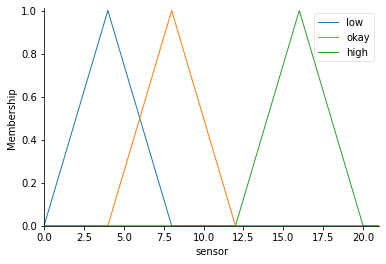

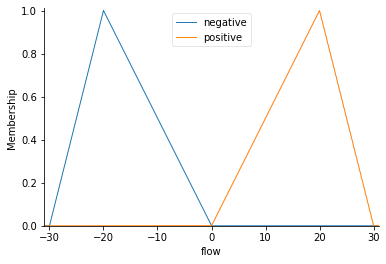

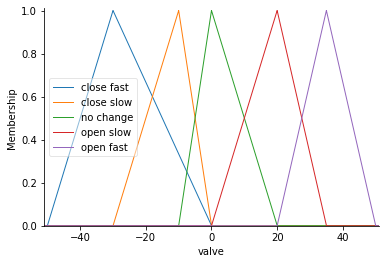

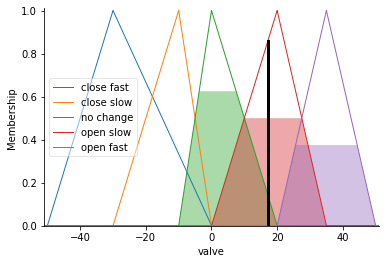

In [6]:
#water level control
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#input
sensor = ctrl.Antecedent(np.arange(0,21,0.01), 'sensor')
flow = ctrl.Antecedent(np.arange(-31,31,0.01), 'flow')

#output 
#valve
valve = ctrl.Consequent(np.arange(-51,51,0.01),'valve')

#create func
#sensor level
sensor['low'] = fuzz.trimf(sensor.universe,[0,4,8])
sensor['okay'] = fuzz.trimf(sensor.universe,[4,8,12])
sensor['high'] = fuzz.trimf(sensor.universe,[12,16,20])

#flow 
flow['negative'] = fuzz.trimf(flow.universe,[-30,-20,0])
flow['positive'] = fuzz.trimf(flow.universe,[0,20,30])

#valve
valve['close fast'] = fuzz.trimf(valve.universe,[-50,-30,0])
valve['close slow'] = fuzz.trimf(valve.universe,[-30,-10,0])
valve['no change'] = fuzz.trimf(valve.universe,[-10,0,20])
valve['open slow'] = fuzz.trimf(valve.universe,[0,20,35])
valve['open fast'] = fuzz.trimf(valve.universe,[20,35,50])

sensor.view()
flow.view()
valve.view()


rule1 = ctrl.Rule(sensor['low'], valve['open fast'])
rule2 = ctrl.Rule(sensor['okay'] & flow['negative'], valve['open slow'])
rule3 = ctrl.Rule(sensor['okay'], valve['no change'])
rule4 = ctrl.Rule(sensor['okay'] & flow['positive'], valve['close slow'])
rule5 = ctrl.Rule(sensor['high'], valve['close fast'])



valving_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
valving = ctrl.ControlSystemSimulation(valving_ctrl)
valving.input['sensor']=6.5
valving.input['flow']=-25
valving.compute()
print(valving.output['valve'])
valve.view(sim=valving)